In [533]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [534]:
df = pd.read_csv('dataset/encoded_preprocessed.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516,9,12,4,0,1,4,1,2174.0,1872.178505,40,37,0
1,50.0,4,83311,9,12,2,3,0,4,1,7298.0,1872.178505,13,37,0
2,38.0,2,215646,11,8,0,5,1,4,1,7298.0,1872.178505,40,37,0
3,53.0,2,234721,1,6,2,5,0,2,1,7298.0,1872.178505,40,37,0
4,28.0,2,338409,9,12,2,9,5,2,0,7298.0,1872.178505,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44453,33.0,2,245211,9,12,4,9,3,4,1,7298.0,1872.178505,40,37,0
44454,39.0,2,215419,9,12,0,9,1,4,0,7298.0,1872.178505,36,37,0
44455,38.0,2,374983,9,12,2,9,0,4,1,7298.0,1872.178505,50,37,0
44456,44.0,2,83891,9,12,0,0,3,1,1,5455.0,1872.178505,40,37,0


In [535]:
X  = df.drop('income', axis=1)
y = df['income']

In [536]:
x_train,x_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [537]:
len(x_train), len(x_test), len(y_train), len(y_test)

(35566, 8892, 35566, 8892)

In [538]:
# Checking the  class imbalence

In [539]:
y_unique = y.unique()

In [540]:
frequency = df['income'].value_counts()

# Display the frequency of each unique value
print(frequency)


income
0    33526
1    10932
Name: count, dtype: int64


# Train Random Forest

In [541]:
rf = RandomForestClassifier()

In [542]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [543]:
y_predict = rf.predict(x_test)

In [544]:
rf_accuracy = accuracy_score(y_test, y_predict)
rf_accuracy

0.8482905982905983

In [545]:
rf.score(x_test,y_test)

0.8482905982905983

In [546]:
rf.score(x_train,y_train)

0.9998875330371704

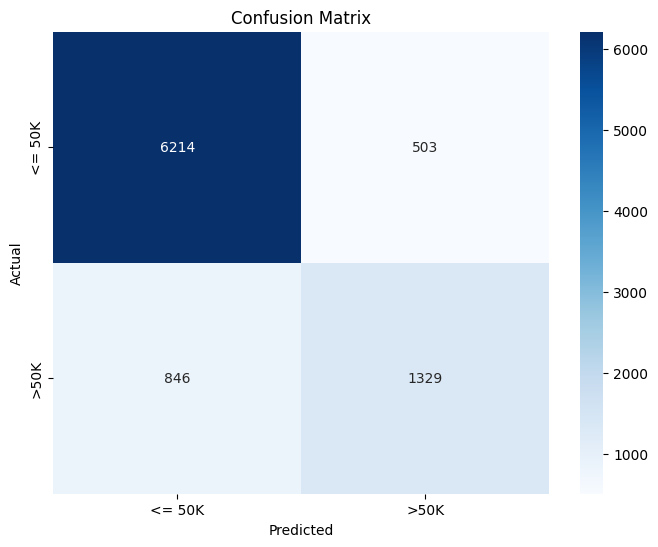

In [547]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<= 50K', '>50K'], yticklabels=['<= 50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyper parameter tuning for Random Forest Classifier

In [548]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt']  # Change 'auto' to 'sqrt'
}


# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

# Evaluate the model
accuracy_test = best_rf.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy_test)

accuracy_train = best_rf.score(x_train, y_train)
print("Accuracy on Training Set:", accuracy_train)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
Accuracy on Test Set: 0.8593117408906883
Accuracy on Training Set: 0.9480683799134004


In [549]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],  # Adjust max_depth to control overfitting
    'max_features': ['sqrt']
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

# Evaluate the model
accuracy_test = best_rf.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy_test)

accuracy_train = best_rf.score(x_train, y_train)
print("Accuracy on Training Set:", accuracy_train)


Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}
Accuracy on Test Set: 0.8569500674763832
Accuracy on Training Set: 0.8952089073834562


In [550]:
y_predict = best_rf.predict(x_test)

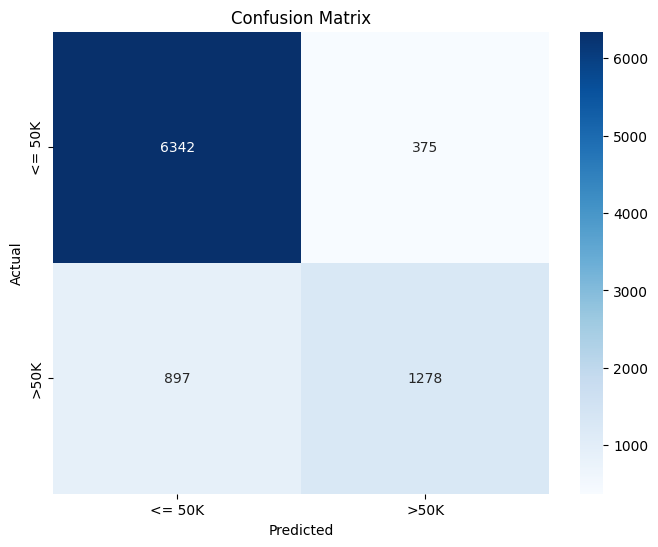

In [551]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<= 50K', '>50K'], yticklabels=['<= 50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Train Naive Bayes

In [552]:
from sklearn.naive_bayes import GaussianNB

In [553]:
nb_clf = GaussianNB()

In [554]:
nb_clf.fit(x_train, y_train)

GaussianNB()

In [555]:
nb_clf.score(x_train, y_train)

0.7571275937693303

In [556]:
nb_clf.score(x_test, y_test)

0.7583220872694557

In [557]:
y_predict = nb_clf.predict(x_test)

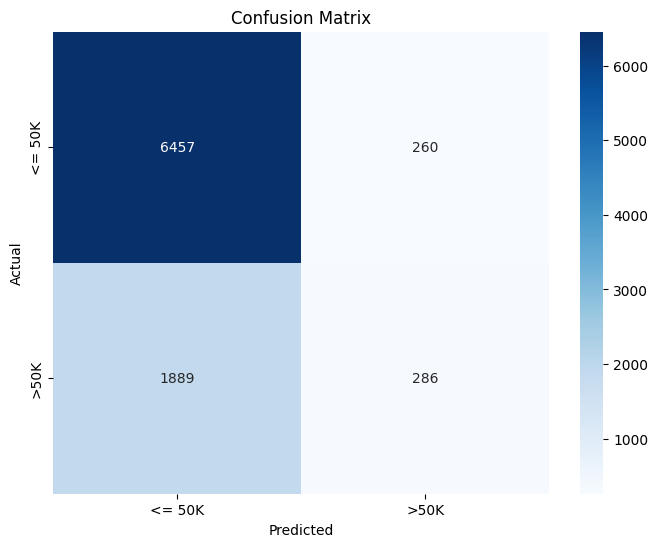

In [558]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<= 50K', '>50K'], yticklabels=['<= 50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [559]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_nb = GaussianNB(**best_params)
best_nb.fit(x_train, y_train)

# Evaluate the model
accuracy_test = best_nb.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy_test)

acuuracy_train = best_nb.score(x_train,y_train)
print("Accuracy on Test Set:", accuracy_train)


Best Parameters: {'var_smoothing': 1e-09}
Accuracy on Test Set: 0.7583220872694557
Accuracy on Test Set: 0.8952089073834562


In [560]:
from sklearn.model_selection import GridSearchCV

# Define a larger parameter grid
param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_nb = GaussianNB(**best_params)
best_nb.fit(x_train, y_train)

# Evaluate the model
accuracy_test = best_nb.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy_test)

acuuracy_train = best_nb.score(x_train,y_train)
print("Accuracy on Test Set:", accuracy_train)


Best Parameters: {'var_smoothing': 1e-11}
Accuracy on Test Set: 0.7937471884840306
Accuracy on Test Set: 0.8952089073834562
